In [28]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))
from draw_hyperbolic import draw_hyperbolic_multiplex
import Hyperbolic as hyp

In [29]:
data_path = '../../real_data_experiments/multiplex_embeddings_data/CS-Aarhus_Multiplex_Social'
layer_paths = [
    os.path.join(data_path, f'l_{i}.txt')
    for i in range(1, 5 + 1)
]
G_loaded = [nx.read_edgelist(
    layer_path,
    create_using=nx.Graph,
    nodetype=int,
) for layer_path in layer_paths]
print(*G_loaded, sep='\n')

G = [g for g in G_loaded if len(g) > 50]
# G = [g for g in G_loaded if len(g.edges) > 8000]
print()
print(*G, sep='\n')

possible_nodes = set(G[0].nodes).union(
    *(set(g.nodes) for g in G[1:]),
)
real_nodes = possible_nodes.intersection(*(g.nodes for g in G))
print(f'Only {len(real_nodes)} real nodes that are present in all layers')

print(f'Dropping {len(possible_nodes) - len(real_nodes)} redundant nodes')
for g in G:
    g.remove_nodes_from([n for n in g if n not in real_nodes])

Graph with 60 nodes and 193 edges
Graph with 32 nodes and 124 edges
Graph with 25 nodes and 21 edges
Graph with 47 nodes and 88 edges
Graph with 60 nodes and 194 edges

Graph with 60 nodes and 193 edges
Graph with 60 nodes and 194 edges
Only 59 real nodes that are present in all layers
Dropping 2 redundant nodes


In [30]:
for i, g in enumerate(G):
    g = nx.relabel_nodes(g, dict(zip(G[0].nodes, range(len(G[0])))))
    nx.write_edgelist(g, f'network{i + 1}.txt', data=False)

2.34580166246836

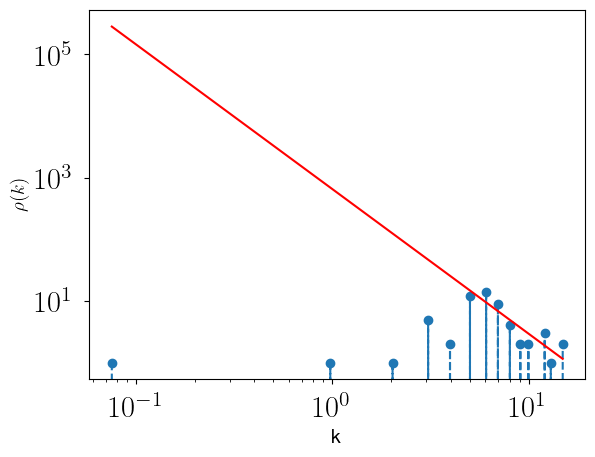

In [13]:
%matplotlib inline
degree = [d for _, d in G[0].degree]
cutoff = 6
h, x = np.histogram(degree, bins=100) 
x_ = (x[:-1]+x[1:]) / 2

z = np.polyfit(np.log(x_[np.nonzero(h)][cutoff:]), np.log(h[np.nonzero(h)][cutoff:]), 1) 
f = np.poly1d(z)

plt.plot(x_, h, 'o--')
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

lambda1 = -z[0]
lambda1

1.211091172193602

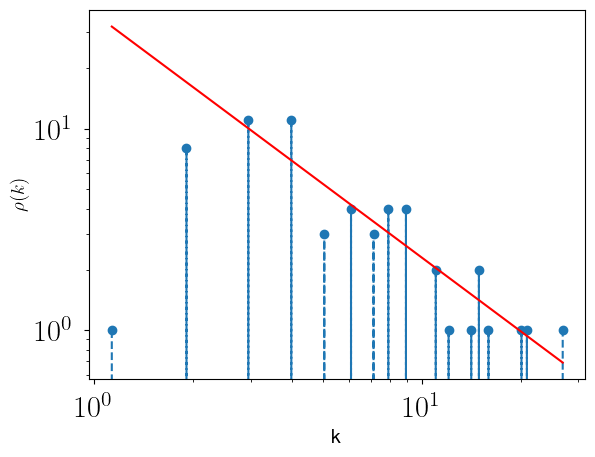

In [31]:
%matplotlib inline
degree = [d for _, d in G[1].degree]
cutoff = 2
h, x = np.histogram(degree, bins=100) 
x_ = (x[:-1]+x[1:]) / 2

z = np.polyfit(np.log(x_[np.nonzero(h)][cutoff:]), np.log(h[np.nonzero(h)][cutoff:]), 1) 
f = np.poly1d(z)

plt.plot(x_, h, 'o--')
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

lambda2 = -z[0]
lambda2

In [45]:
coords1 = np.array(hyp.ReadCoordinates('coordinates_embedding1.txt'))
coords2 = np.array(hyp.ReadCoordinates('coordinates_embedding2.txt'))

In [46]:
[n for n in coords1[:, 0] if n not in coords2[:, 0]]

[]

In [47]:
[n for n in coords2[:, 0] if n not in coords1[:, 0]]

[0.0]

In [48]:
coords1 = np.vstack((coords1, coords2[0]))

In [49]:
r1 = coords1[:, 2]
r2 = coords2[:, 2]

theta1 = coords1[:, 1]
theta2 = coords2[:, 1]

In [50]:
links1 = hyp.ReadLinks('network1.txt')
links2 = hyp.ReadLinks('network2.txt')

number of links:	 191
number of links:	 192


In [51]:
plt.rc('text', usetex=True)
plt.rc('font', size=22, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

In [52]:
num = 200
T = .4
N = len(G[0])

lambda1 = max(lambda1, 2.5)
lambda2 = max(lambda2, 2.5)

assert N == len(G[1]), 'Must have the same number of nodes'
mean_degree_1 = np.mean([d for _, d in G[0].degree])
mean_degree_2 = np.mean([d for _, d in G[1].degree])
print(mean_degree_1, mean_degree_2)

C1 = hyp.CalculateC(mean_degree_1, T, lambda1)
Rmax_1 = 2 * np.log(N / C1)

C2 = hyp.CalculateC(mean_degree_2, T, lambda2)
Rmax_2 = 2 * np.log(N / C2)
Rmax_1, Rmax_2

6.47457627118644 6.508474576271187


(8.467834190296983, 8.45739030233468)


Starting AP removal
AP removal: iteration 1
AP removal: 3 APs
AP removal: iteration 2
AP removal: 3 APs
AP removal: iteration 3
AP removal: 2 APs
AP removal: iteration 4
AP removal: 0 APs


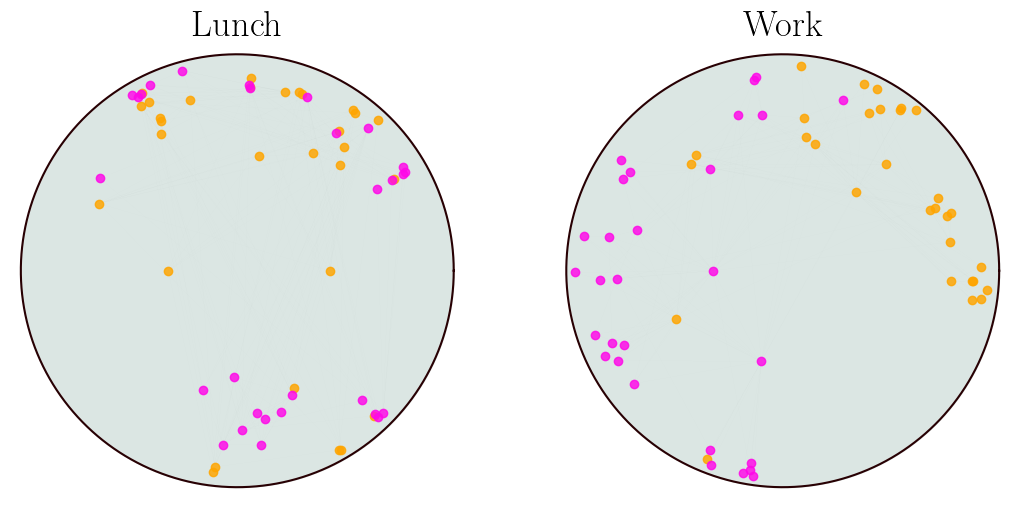

In [65]:
fig, ax = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 6),
    subplot_kw=dict(projection='polar'),
)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
draw_hyperbolic_multiplex(links1, links2, r1, r2, theta1, theta2, *ax, ms=6)
ax[0].set_title(r'$\mathrm{Lunch}$')
ax[1].set_title(r'$\mathrm{Work}$')

ax[0].plot(np.linspace(0, 2 * np.pi, num=num), [Rmax_1] * num, '-', color='#280003')
ax[0].fill_between(np.linspace(0, 2 * np.pi, num=num), 0, y2=Rmax_1, color='#DBE6E3')

ax[1].plot(np.linspace(0, 2 * np.pi, num=num), [Rmax_2] * num, '-', color='#280003')
ax[1].fill_between(np.linspace(0, 2 * np.pi, num=num), 0, y2=Rmax_2, color='#DBE6E3');

In [64]:
fig.savefig('real_hyperbolic.pdf')